In [4]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

by: Wei Liu

## Load, pre-process data

In [5]:
class Establishment:
    """
    Class of establishment.
    """
    def __init__(self, idx, latitude, longitude, name, types):
        self.idx = idx
        self.latitude = latitude
        self.longitude = longitude
        self.name = name
        self.types = types
    def __str__(self):
        return "Estab_name: " + self.name + "; types: " + self.types\
                + "; GPS: " + "(" + self.latitude + ", " + self.longitude + ")"
    def get_param(self):
        return [self.idx, self.latitude, self.longitude, self.name, self.types]

In [6]:
class FileReader:
    """
    Class to read GPS files.
    """
    def __init__(self):
        self.df_estabs = None
    def read_CSV(self, file_path, col_names = None):
        """
        Get the GPS data from file_path
        return: dataframe, otherwise throw IO exception
        """
        try:
            if(col_names):
                df = pd.read_csv(file_path, names = col_names)
            else:
                df = pd.read_csv(file_path)
            return df
        except IOError:
            print("Could not read file:", file_path)
    
    def read_establishments(self, file_path):
        """
        Clean the input CSV data
        return: dataframe contains the establishments information
        The format of the data should be same as the "nearby_establishments.csv"
        """
        df = self.read_CSV(file_path)
        col_names = df.iloc[:,0].name.split(";")
        _list = list(map(lambda s:s.split(";"), df.iloc[:,0].tolist()))
        self.df_estabs = pd.DataFrame(_list,columns = col_names)
        return self.df_estabs
    def get_establishments(self):
        """
        Get all the establishments objects from the feeded file
        return: a list contains all establishments
        """
        list_estabs = []
        cords = set()
        duplicated_cord = []
        for i in self.df_estabs.index:
            lat, long = self.df_estabs.iloc[i][0], self.df_estabs.iloc[i][1]
            est = Establishment(i, *self.df_estabs.iloc[i].tolist())
            if ((lat,long) not in cords):                
                #list_estabs.append(self.df_estabs.iloc[i].tolist())
                list_estabs.append(est)
                cords.add((lat, long))
            else:
                print("duplicated cords found: " + str(est))
        return list_estabs
    

In [7]:
#provide the file path
GPS_file_path = r"F:\\lenovo\\user_location.txt"
est_file_path = r"F:\\lenovo\\1.csv"
col_names = ["latitude", "longitude"] #add column names if you want

In [8]:
reader = FileReader()
df_gps = reader.read_CSV(GPS_file_path, col_names) #get the original dataframe
df_gps.head() #show dataframe of gps records

,latitude,longitude
0,35.829291,-78.771485
1,35.858187,-78.835454
2,35.829329,-78.771382
3,35.858036,-78.835324
4,35.789338,-78.869477


In [9]:
#read and pre-process the establishments data
df_estabs = reader.read_establishments(est_file_path) 
df_estabs

,establishment_latitude,establishment_longitude,establishment_name,establishment_types
0,35.7795897,-78.6381787,Raleigh,locality
1,35.7992765,-78.6899516,Carlyle Campbell Library,library
2,35.79958279999999,-78.6908077,Frankie G. Weems Art Gallery,art_gallery
3,35.7989103,-78.6909706,Martin Lot Staff,premise
4,35.823483,-78.8255621,Morrisville,locality
5,35.8577575,-78.8359571,UNC Health Care's Morrisville campus,point_of_interest
6,35.8577575,-78.8359571,ISD UNC Health Care,point_of_interest
7,35.79154,-78.7811169,Cary,locality
8,35.7896757,-78.8700624,Starbucks,cafe
9,35.7892183,-78.870043,Biscuitville,cafe


## Explorint the data

In [10]:
#get all the essential information of the establishments, if there are dupulicated data exist, program will output 
#string for reminder
list_estabs = reader.get_establishments()

duplicated cords found: Estab_name: ISD UNC Health Care; types: point_of_interest; GPS: (35.8577575, -78.8359571)
duplicated cords found: Estab_name: Cary; types: locality; GPS: (35.79154, -78.7811169)
duplicated cords found: Estab_name: Morrisville; types: locality; GPS: (35.823483, -78.8255621)


In [11]:
#examine the first establishment information in the array
str(list_estabs[0])

'Estab_name: Raleigh; types: locality; GPS: (35.7795897, -78.6381787)'

In [12]:
#get all the centers from the list_estabs
centers_estabs = []
for i in list_estabs:
    centers_estabs.append([float(i.latitude), float(i.longitude)])
centers_estabs = np.array(centers_estabs)
centers_estabs

array([[ 35.7795897, -78.6381787],
       [ 35.7992765, -78.6899516],
       [ 35.7995828, -78.6908077],
       [ 35.7989103, -78.6909706],
       [ 35.823483 , -78.8255621],
       [ 35.8577575, -78.8359571],
       [ 35.79154  , -78.7811169],
       [ 35.7896757, -78.8700624],
       [ 35.7892183, -78.870043 ],
       [ 35.829423 , -78.771696 ],
       [ 35.8293456, -78.7707877],
       [ 35.8302672, -78.771261 ],
       [ 35.829396 , -78.7710061],
       [ 35.82946  , -78.772311 ],
       [ 35.827521 , -78.7724144],
       [ 35.858719 , -78.818958 ],
       [ 35.8581983, -78.8199726],
       [ 35.8586387, -78.8194197],
       [ 35.8587064, -78.8184502],
       [ 35.8591226, -78.8193858],
       [ 35.8580603, -78.8197975]])

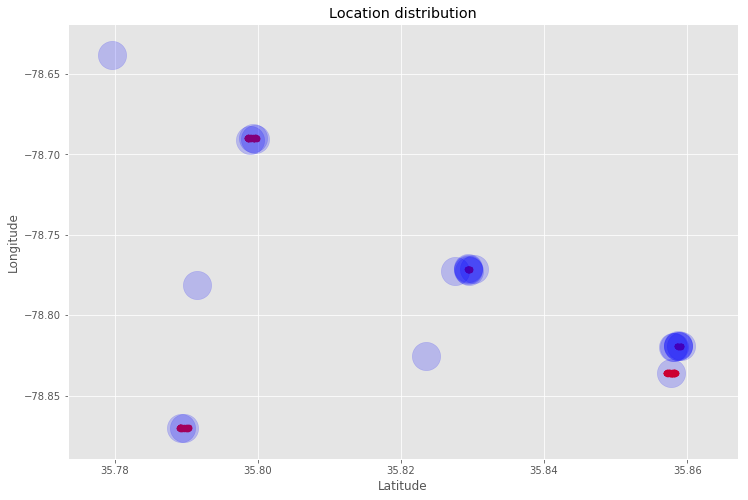

In [13]:
#plot the GPS and establishments data ont the same scatter plot, exploring the data distribution
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.scatter(df_gps["latitude"], df_gps["longitude"], s=25, c='red', marker='o',alpha=1)
ax.scatter(centers_estabs[:,0], centers_estabs[:,1], s=800, c='blue', marker='o',alpha = 0.2)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Location distribution')
# for i, txt in enumerate(names):
#     ax.annotate(i, (latitude_estabs[i],longitude_estabs[i]))
plt.show()

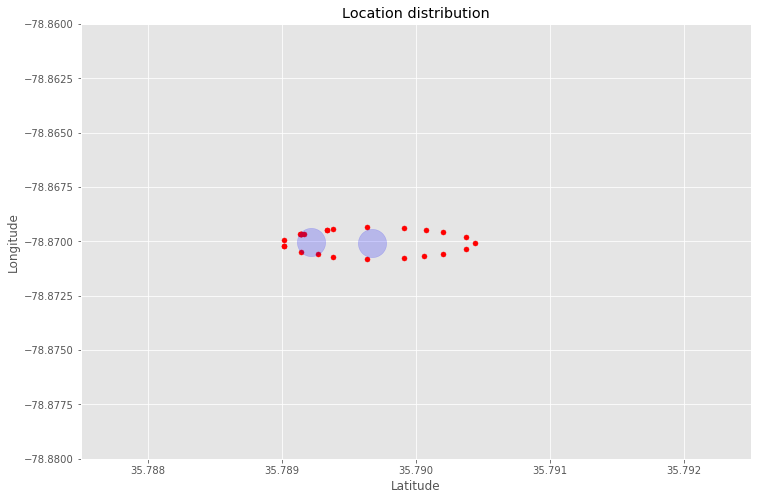

In [14]:
#zoom in
ax.axis([35.7875,35.7925,-78.88,-78.86])
fig

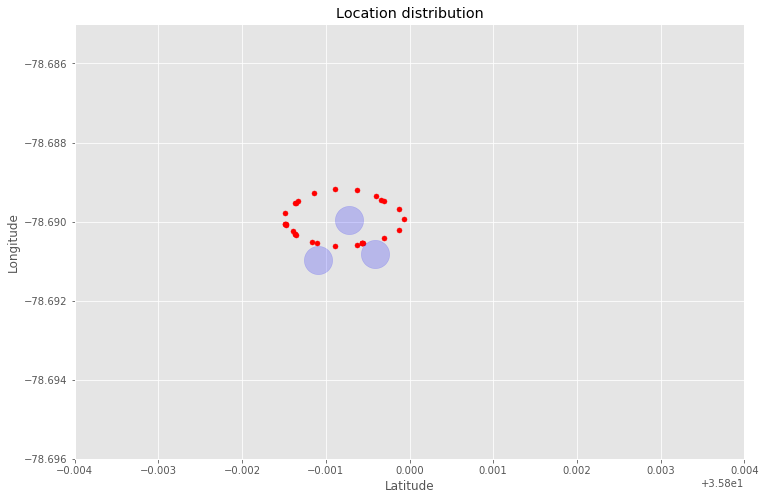

In [15]:
#zoom in
ax.axis([35.796,35.804,-78.696,-78.685])
fig

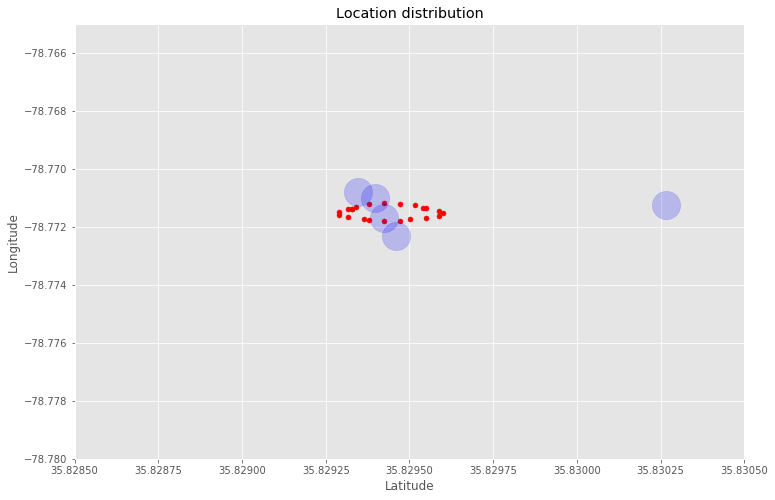

In [16]:
#zoom in
ax.axis([35.8285,35.8305,-78.780,-78.765])
fig

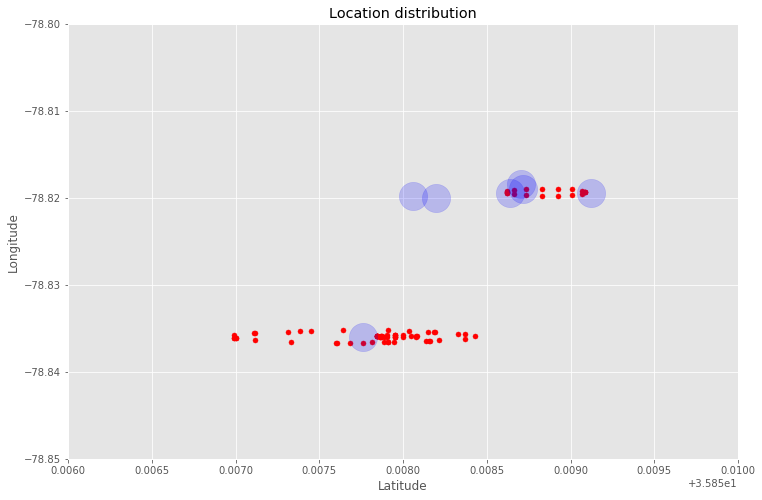

In [17]:
#zoom in
ax.axis([35.856,35.860,-78.85,-78.80])
fig

In [18]:
#given two GPS cooridinates, computes the distance between them
from math import sin, cos, sqrt, atan2, radians
def cal_dist(cord1, cord2):    
    R = 6373.0 #approximate radius of earth in km
    lat1 = radians(cord1[0])
    lon1 = radians(cord1[1])
    lat2 = radians(cord2[0])
    lon2 = radians(cord2[1])    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

In [19]:
#exploring the distances between those establishments
estabs_num = len(centers_estabs)
dists = []
for i in range(estabs_num):
    for j in range(0, i):
        dists.append(cal_dist(centers_estabs[i], centers_estabs[j]))

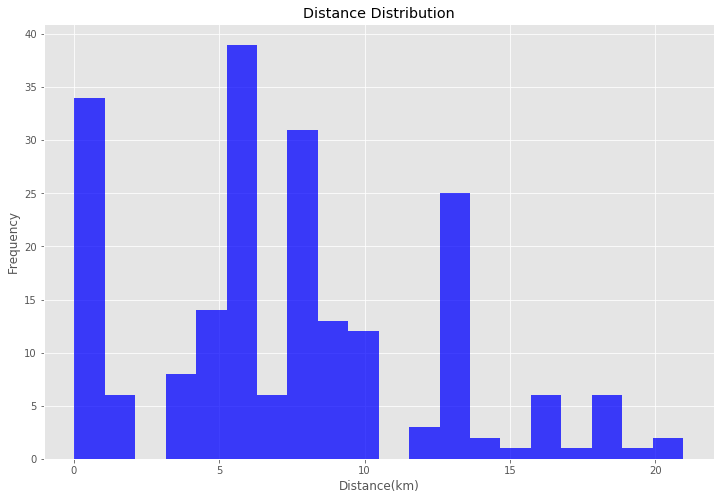

In [20]:
plt.hist(dists, 20, facecolor="blue", alpha=0.75)
plt.title("Distance Distribution")
plt.xlabel("Distance(km)")
plt.ylabel("Frequency")
fig = plt.gcf()

## Algorithm design

### Find clusters (method 1)

In [21]:
#convert the GPS date to list
list_gps = df_gps.as_matrix()

In [22]:
#method 1: assign each points to its nearest establishment
from collections import defaultdict
def Kmeans_one_round():
    dic = defaultdict(int)
    for est in list_estabs:
        dic[est] = 0
    for loc in list_gps:
        distances = []
        for est in centers_estabs:
            distances.append(cal_dist(loc, est))
        idx = np.argmin(distances)
        dic[list_estabs[idx]] += 1
    return dic
dic = Kmeans_one_round()

In [23]:
#show the result: we assume the importance of a establishment is positively corelated to its cluster size
def show_result(dic):
    summ = 0
    for k in sorted(dic, key=dic.get, reverse=True):
        print (k.name, dic[k])
        summ += dic[k]
    assert(summ == len(list_gps)) ##check if all the GPS points was counted
show_result(dic)

UNC Health Care's Morrisville campus 63
Extended Stay America Raleigh - Cary - Harrison Ave. 17
Carlyle Campbell Library 16
Biscuitville 14
Starbucks 11
Waffle House 8
Frankie G. Weems Art Gallery 7
Martin Lot Staff 7
Airport Blvd at Aerial Center Pkwy (Waffle House) 7
CapriFlavors 5
Hampton Inn Raleigh-Durham Airport 5
Raleigh 0
Morrisville 0
Cary 0
Jiffy Lube 0
Bass Pro Shops 0
Harrison Oaks Blvd at Weston Pkwy 0
The Arboretum 0
Days Inn Raleigh-Airport-Research Triangle Park 0
Daly Seven Inc 0
1006 Airport Blvd Parking 0


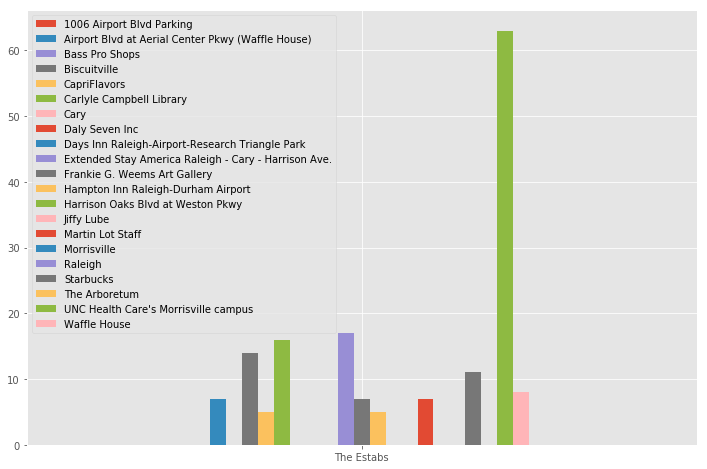

In [24]:
#get intuition of the different establishments
def plot():
    dic_ = {}
    for k,v in dic.items():
        dic_[k.name] = v
    dfx = pd.DataFrame(dic_, index = ["The Estabs"])
    dfx.plot(kind='bar',rot=0)
plot()

### Find clusers (k-means, method 2)

In [25]:
class Kmeans:
    """
    Kmeans algorithms to find clusters based on their physical distance.
    """
    def __init__(self):
        self.centers = None
        self.cluster_to_point = None
        
    def cal_dist(self,cord1, cord2):
        """
        Calculate distance of two GPS coordinates
        input: two GPS coordinates
        return: int number, distance in km
        """
        R = 6373.0 #approximate radius of earth in km
        lat1 = radians(cord1[0])
        lon1 = radians(cord1[1])
        lat2 = radians(cord2[0])
        lon2 = radians(cord2[1])    
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distance = R * c
        return distance
    
    def center_dist(self, arr1, arr2, ax=1):
        """
        Compute the distance of two arrays
        return: float number, np.linalg.norm
        """
        return np.linalg.norm(arr1 - arr2, axis=ax)
    
    def physic_dist(self, cord, centers):
        """
        Compute the physic distance between cord and each point in centers
        return: distances array which represents the physic distances of 
        cord to each center in centers array
        """
        distances = []            
        for c in centers:
            distances.append(self.cal_dist(cord, c))
        return distances
    
    def compute(self, k, dim, x, init_centers = None, epsilon = 1e-10):
        """
        K-means algorithm, with the customized dist function and initialization method
        return None
        """
        if init_centers == None:
            self.centers = np.zeros((k,dim))
            for i in range(k):
                self.centers[i] = x[np.random.randint(0,x.shape[0])]#randomly choose points as seed
        else:
            self.centers = np.array(init_centers)
        centers_update = np.zeros((k,dim))
        residue = self.center_dist(centers_update, self.centers, None)
        self.cluster_to_point = [[] for i in range(k)]        
        while residue > epsilon:
            for i in range(len(x)): #for all the data points
                distances = self.physic_dist(x[i], self.centers) #return the dists of x[i] to all centers
                cluster = np.argmin(distances) #return the index of the min dist            
                self.cluster_to_point[cluster].append(x[i].tolist())
            centers_update = np.zeros((k,dim))
            for i in range(k):
                centers_update[i] = np.mean(self.cluster_to_point[i], axis = 0)
            residue = self.center_dist(centers_update, self.centers, None)            
            self.centers = centers_update
    def check_radius(self):
        """
        Check if we have a good initialization of the seed, generally, we will endup with a large cluster if we had
        a bad init seed
        retrun a list represents the radius of each cluster
        """
        radius = []        
        for i in range(len(self.centers)):
            if(len(self.cluster_to_point[i]) != 0):
                res = 0
                for c in self.cluster_to_point[i]:
                    res = max(res, self.cal_dist(c, self.centers[i]))
                radius.append(res)
        return radius
    def get_centers(self):
        return self.centers
    def get_clusters(self):
        return self.cluster_to_point


In [26]:
import warnings
warnings.filterwarnings("ignore")
kmeans = Kmeans()
k = len(centers_estabs) # k clusters
dim = 2 #dimension = 2
kmeans.compute(k, dim, list_gps, init_centers = centers_estabs.tolist())

In [27]:
# all the centers of clusters
centers_cluster = kmeans.get_centers()
cluster_to_point = kmeans.get_clusters()
centers_cluster

array([[         nan,          nan],
       [ 35.79904067, -78.68963169],
       [ 35.79952484, -78.69048433],
       [ 35.7987671 , -78.69041078],
       [         nan,          nan],
       [ 35.85780888, -78.83597282],
       [         nan,          nan],
       [ 35.79007535, -78.87007741],
       [ 35.78918686, -78.86992024],
       [ 35.82943708, -78.77157353],
       [         nan,          nan],
       [         nan,          nan],
       [ 35.82942633, -78.77123347],
       [         nan,          nan],
       [         nan,          nan],
       [ 35.8588325 , -78.81899968],
       [         nan,          nan],
       [ 35.85866709, -78.81946191],
       [         nan,          nan],
       [ 35.85904663, -78.81944097],
       [         nan,          nan]])

In [28]:
#check the radius
kmeans.check_radius()

[0.10335779415809133,
 0.04632939844635364,
 0.04264085028208585,
 0.09233317704947942,
 0.08236399876431565,
 0.074870370812517,
 0.022857645183081133,
 0.011635469032824917,
 0.020711604244885863,
 0.031151736689348022,
 0.02926714038702704]

In [29]:
#we will delete those empty cluster centers for plotting
clusters = []
for i in cluster_to_point:
    if i:
        clusters.append(i)
valid_centers = centers_cluster[~np.any(np.isnan(centers_cluster), axis=1)]

In [30]:
valid_centers

array([[ 35.79904067, -78.68963169],
       [ 35.79952484, -78.69048433],
       [ 35.7987671 , -78.69041078],
       [ 35.85780888, -78.83597282],
       [ 35.79007535, -78.87007741],
       [ 35.78918686, -78.86992024],
       [ 35.82943708, -78.77157353],
       [ 35.82942633, -78.77123347],
       [ 35.8588325 , -78.81899968],
       [ 35.85866709, -78.81946191],
       [ 35.85904663, -78.81944097]])

In [31]:
centers_estabs.tolist()

[[35.7795897, -78.6381787],
 [35.7992765, -78.6899516],
 [35.79958279999999, -78.6908077],
 [35.7989103, -78.6909706],
 [35.823483, -78.8255621],
 [35.8577575, -78.8359571],
 [35.79154, -78.7811169],
 [35.7896757, -78.8700624],
 [35.7892183, -78.870043],
 [35.829423, -78.77169599999999],
 [35.8293456, -78.7707877],
 [35.8302672, -78.771261],
 [35.829396, -78.7710061],
 [35.82945999999999, -78.772311],
 [35.827521, -78.7724144],
 [35.858719, -78.818958],
 [35.8581983, -78.8199726],
 [35.85863870000001, -78.8194197],
 [35.8587064, -78.8184502],
 [35.8591226, -78.81938579999999],
 [35.8580603, -78.81979749999999]]

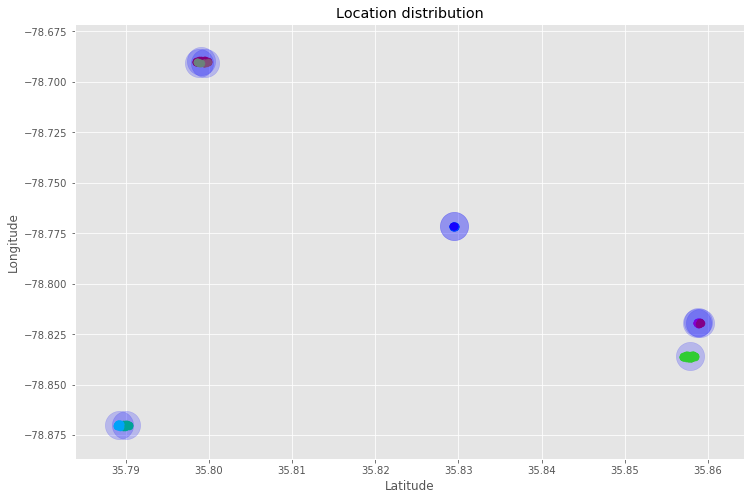

In [32]:
##plot the clusters and centers, the centers may shift a little bit compares the estabs centers
from matplotlib import cm
ind = np.arange(len(valid_centers))
plt.style.use('ggplot')
colors = cm.hsv(ind/float(max(ind)))
fig, ax = plt.subplots()
for i in range(len(valid_centers)):    
    points = np.array(clusters[i])
    ax.scatter(points[:,0],points[:,1], s = 50, c = colors[i])
ax.scatter(valid_centers[:, 0], valid_centers[:, 1], s=800, c='blue', marker='o',alpha = 0.2)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Location distribution')
plt.show()

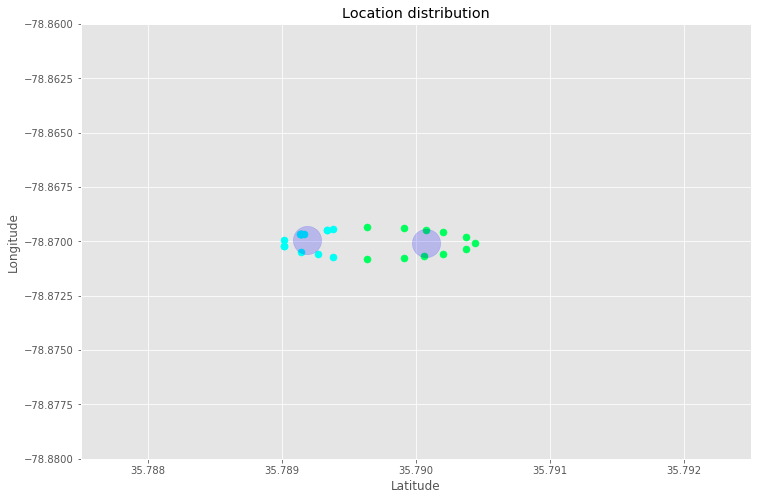

In [33]:
ax.axis([35.7875,35.7925,-78.88,-78.86])
fig

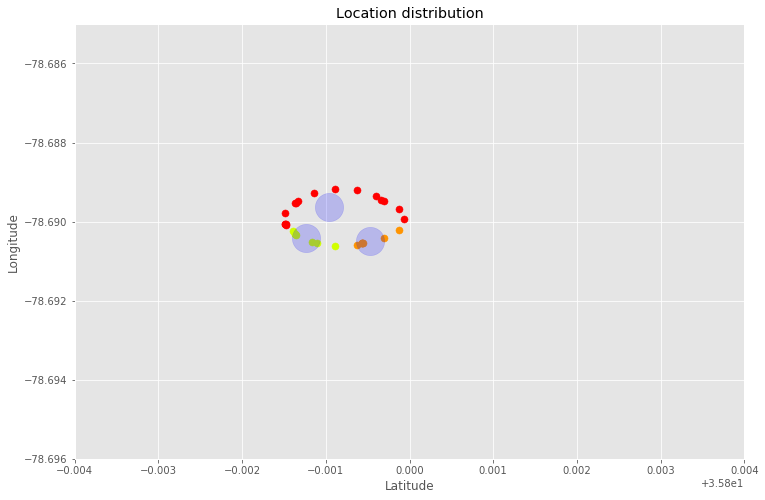

In [34]:
ax.axis([35.796,35.804,-78.696,-78.685])
fig

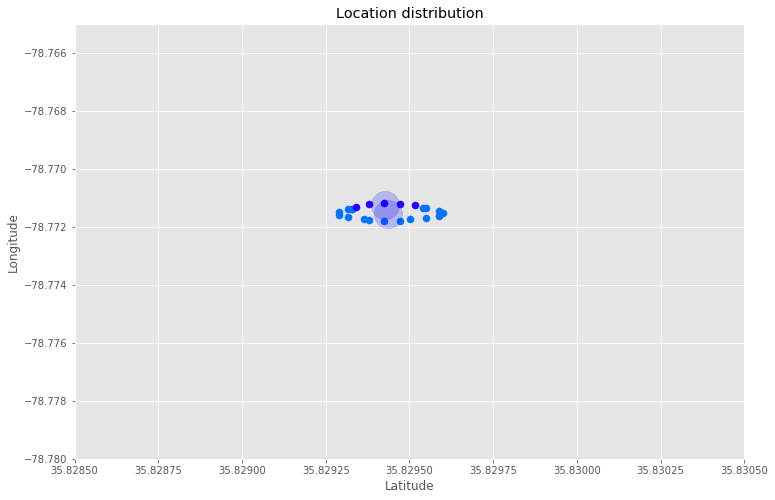

In [35]:
ax.axis([35.8285,35.8305,-78.780,-78.765])
fig

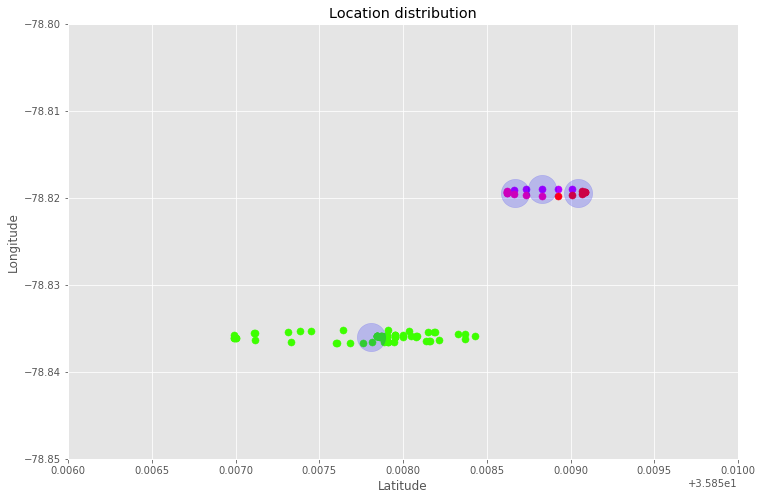

In [36]:
ax.axis([35.856,35.860,-78.85,-78.80])
fig

In [37]:
len(list_estabs)

21

In [38]:
for i in list_estabs:
    print (str(i))

Estab_name: Raleigh; types: locality; GPS: (35.7795897, -78.6381787)
Estab_name: Carlyle Campbell Library; types: library; GPS: (35.7992765, -78.6899516)
Estab_name: Frankie G. Weems Art Gallery; types: art_gallery; GPS: (35.79958279999999, -78.6908077)
Estab_name: Martin Lot Staff; types: premise; GPS: (35.7989103, -78.6909706)
Estab_name: Morrisville; types: locality; GPS: (35.823483, -78.8255621)
Estab_name: UNC Health Care's Morrisville campus; types: point_of_interest; GPS: (35.8577575, -78.8359571)
Estab_name: Cary; types: locality; GPS: (35.79154, -78.7811169)
Estab_name: Starbucks; types: cafe; GPS: (35.7896757, -78.8700624)
Estab_name: Biscuitville; types: cafe; GPS: (35.7892183, -78.870043)
Estab_name: Extended Stay America Raleigh - Cary - Harrison Ave.; types: lodging; GPS: (35.829423, -78.77169599999999)
Estab_name: Jiffy Lube; types: car_repair; GPS: (35.8293456, -78.7707877)
Estab_name: Bass Pro Shops; types: shoe_store; GPS: (35.8302672, -78.771261)
Estab_name: CapriFla

In [39]:
#the output of the algorithm 2 (customized k-means)
from collections import defaultdict
dic2 = defaultdict(int)
for c in centers_cluster:
    distances = []
    for est in centers_estabs:
        distances.append(cal_dist(c, est))
    idx = np.argmin(distances)
    if(cluster_to_point[idx] != 0):
        dic2[list_estabs[idx]] += len(cluster_to_point[idx])
    else:
        dic2[list_estabs[idx]] = 0
show_result(dic2)

UNC Health Care's Morrisville campus 63
Extended Stay America Raleigh - Cary - Harrison Ave. 17
Carlyle Campbell Library 16
Biscuitville 14
Starbucks 11
Waffle House 8
Frankie G. Weems Art Gallery 7
Martin Lot Staff 7
Airport Blvd at Aerial Center Pkwy (Waffle House) 7
CapriFlavors 5
Hampton Inn Raleigh-Durham Airport 5
Raleigh 0


### Considering the importance of each establishment

In [40]:
def cal_factor_1(threshold = 1):
    dic = defaultdict(int)
    for est in list_estabs:
        dic[est] = threshold
    for loc in list_gps:
        distances = []
        for est in centers_estabs:
            distances.append(cal_dist(loc, est))
        idx = np.argmin(distances)
        dic[list_estabs[idx]] += 1
    
    dic_imp = {}
    summ = 0
    for v in dic.values():
        summ += v
    for k,v in dic.items():
        dic_imp[k] = v/summ
    return dic_imp    

dic = cal_factor_1(1) #we set the threshold to 1
def rank_dic(dic):
    for k in sorted(dic, key=dic.get, reverse=True):
        print (k.name, dic[k])
         
rank_dic(dic)

UNC Health Care's Morrisville campus 0.35359116022099446
Extended Stay America Raleigh - Cary - Harrison Ave. 0.09944751381215469
Carlyle Campbell Library 0.09392265193370165
Biscuitville 0.08287292817679558
Starbucks 0.06629834254143646
Waffle House 0.049723756906077346
Frankie G. Weems Art Gallery 0.04419889502762431
Martin Lot Staff 0.04419889502762431
Airport Blvd at Aerial Center Pkwy (Waffle House) 0.04419889502762431
CapriFlavors 0.03314917127071823
Hampton Inn Raleigh-Durham Airport 0.03314917127071823
Raleigh 0.0055248618784530384
Morrisville 0.0055248618784530384
Cary 0.0055248618784530384
Jiffy Lube 0.0055248618784530384
Bass Pro Shops 0.0055248618784530384
Harrison Oaks Blvd at Weston Pkwy 0.0055248618784530384
The Arboretum 0.0055248618784530384
Days Inn Raleigh-Airport-Research Triangle Park 0.0055248618784530384
Daly Seven Inc 0.0055248618784530384
1006 Airport Blvd Parking 0.0055248618784530384


### Consider the importantance of the user's current location

In [41]:
def cal_all_dist(cur):
    dic = {}
    for est in list_estabs:
        dic[est] = cal_dist(cur, [float(est.latitude), float(est.longitude)])
    return dic
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

def cal_factor_2(cur):
    dic = cal_all_dist(cur)
    new_dic = {}
    summ = 0
    for k,v in dic.items():
        summ += np.exp(v)
    x = 0
    for k,v in dic.items():
        new_dic[k] = (0.00001*summ/v)
        x += (0.00001*summ/v)
    for k,v in dic.items():
        dic[k] = new_dic[k]/x
    return dic

def norm(dic):
    summ = np.sum(list(dic.values()))
    for k,v in dic.items():
        dic[k] = v/summ
        
def total_score(cur, threshold, alpha, beta, gamma):
    dic_imp_1 = cal_factor_1(threshold)
    dic_imp_2 = cal_factor_2(cur)
    res = {}
    for k,v in dic_imp_1.items():
        res[k] = alpha*dic_imp_1[k] + beta*dic_imp_2[k] + gamma
    norm(res)
    return res



In [42]:
#hyper parameters
alpha = 1
beta = 1
threshold = 1
gamma = 0

x = total_score([35,-78], threshold, alpha, beta, gamma) ## when we are far away from all those establishments
rank_dic(x)

UNC Health Care's Morrisville campus 0.199461047543
Extended Stay America Raleigh - Cary - Harrison Ave. 0.0735742397842
Carlyle Campbell Library 0.0723636507655
Biscuitville 0.0648334235739
Starbucks 0.0565384274083
Waffle House 0.0476864513519
Martin Lot Staff 0.0474971043901
Frankie G. Weems Art Gallery 0.0474848491495
Airport Blvd at Aerial Center Pkwy (Waffle House) 0.0449163876743
CapriFlavors 0.040433344548
Hampton Inn Raleigh-Durham Airport 0.0394026779444
Raleigh 0.0292505822731
Cary 0.0272007870095
The Arboretum 0.0266394326344
Jiffy Lube 0.0266245730317
Harrison Oaks Blvd at Weston Pkwy 0.0266053024836
Bass Pro Shops 0.0266024515821
Morrisville 0.0261081501544
Daly Seven Inc 0.0255960610255
1006 Airport Blvd Parking 0.0255925868683
Days Inn Raleigh-Airport-Research Triangle Park 0.0255884688046


In [43]:
x = total_score([ 35.8580603, -78.819797499999], threshold, alpha, beta, gamma)
rank_dic(x)       

1006 Airport Blvd Parking 0.502762427071
UNC Health Care's Morrisville campus 0.176795580141
Extended Stay America Raleigh - Cary - Harrison Ave. 0.0497237569144
Carlyle Campbell Library 0.0469613259702
Biscuitville 0.0414364640934
Starbucks 0.0331491712758
Waffle House 0.0248618790675
Airport Blvd at Aerial Center Pkwy (Waffle House) 0.022099447875
Frankie G. Weems Art Gallery 0.0220994475172
Martin Lot Staff 0.0220994475172
Hampton Inn Raleigh-Durham Airport 0.01657458606
CapriFlavors 0.0165745856436
Days Inn Raleigh-Airport-Research Triangle Park 0.00276243297071
Daly Seven Inc 0.00276243125617
Morrisville 0.00276243095075
Harrison Oaks Blvd at Weston Pkwy 0.00276243094761
Bass Pro Shops 0.00276243094757
Jiffy Lube 0.00276243094743
The Arboretum 0.00276243094742
Cary 0.00276243094469
Raleigh 0.00276243094164
